# **Ejercicios de pair programming Módulo 2 Sprint 1**
## **Repaso**
### **Conceptos de estadística y visualización**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew

In [5]:
games = pd.read_csv("data/games.csv", index_col = 0)

Información del contenido de las columnas

Title - Title of the Game.

Release Date - Date of release of the game's first version

Team - Game developer team

Rating - Average rating

Times Listed - Number of users who listed this game

Number of Reviews - Number of reviews received from the users

Genres - All genres pertaining to a specified game

Summary - Summary provided by the team

Reviews - User reviews

Plays - Number of users that have played the game before

Playing - Number of current users who are playing the game

Backlogs - Number of users who have access but haven't started with the game yet

Wishlist- Number of users who wish to play the game

1. Hacer una exploración inicial del dataframe.
 - ¿Cuántas filas tiene?
 - ¿Cuántas nulos tiene?
 - ¿Y duplicados?
 - ¿Qué tipo de datos tenemos en el dataframe?
 - etc.


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   int64  
 5   Number of Reviews  1512 non-null   int64  
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   int64  
 10  Playing            1512 non-null   int64  
 11  Backlogs           1512 non-null   int64  
 12  Wishlist           1512 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 165.4+ KB


In [10]:
games.duplicated().sum()

382

In [7]:
games.describe()

,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1499.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,3.719346,4352.792989,4352.792989,30211.316799,1035.236772,11244.839286,4866.254630
std,0.532608,7833.427462,7833.427462,26297.043441,3976.652291,14364.926482,8789.051912
min,0.700000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,3.400000,284.000000,284.000000,12000.000000,43.000000,461.750000,212.000000
50%,3.800000,551.000000,551.000000,21000.000000,112.500000,1000.000000,496.000000
75%,4.100000,1000.000000,1000.000000,45000.000000,298.000000,19000.000000,2000.000000
max,4.800000,43000.000000,43000.000000,99000.000000,38000.000000,83000.000000,54000.000000


    - El set tiene 1512 filas.
    - Tiene 1 valor nulo en las columnas Team y Summary y 13 valores nulos en la columna Rating.
    - Tenemos 382 filas duplicadas.
    - En el dataframe tenemos datos numéricos de tipo int y float, y también datos de tipo object (string).
    - Tenemos dos columnas, Times Listed y Number of Reviews, que son idénticas, y que podríamos considerar un duplicado. Con el método .describe comprobamos que tienen los mismos valores. Merecería la pena considerar la eliminación de una de las dos columnas.



2. Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.


 - ¿Cual es el juego mejor valorado? ¿Y el peor?
 - ¿Cual es la valoración que más se repite?
 - ¿Cual es la valoración media de los juegos? ¿Y la mediana? ¿Son muy diferentes?
 - ¿Qué correlaciones interesantes podemos destacar?
 - ¿Existen sesgos en la cantidad de valoraciones? ¿De qué tipo?

3. Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

 - ¿Cual es el juego mejor valorado? ¿Y el peor?

In [18]:
#Este es el juego mejor valorado.
mejor_valorados = games.sort_values(by = "Rating", ascending = False).reset_index()
mejor_valorados.head(1)

,index,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


In [19]:
#Y este es el juego peor valorado
mejor_valorados = games.sort_values(by = "Rating", ascending = False).reset_index()
mejor_valorados.tail(1)

,index,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1511,1349,Pokémon Añil,"Mar 23, 2023",['Eric Lost'],NaN,2,2,['RPG'],Pokémon Añil is the fourth video game created ...,"['pokemon HWHAT', 'Finally, after all these ye...",1,0,1,7


In [21]:
#Como el método anterior nos devuelve un nulo, y analizando la cantidad de nulos que tenemos
# y su relevancia, decidimos eliminar los 13 (como máximo 15) registros con valores nulos.

games = games.dropna()

In [23]:
#Volvemos a ejecutar el código anterior.
mejor_valorados = games.sort_values(by = "Rating", ascending = False).reset_index()
mejor_valorados.tail(1)

,index,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1497,1458,Superman: The New Superman Adventures,"May 31, 1999","['Titus Software', 'WB Games']",0.7,69,69,"['Adventure', 'Shooter']","Superman: The New Adventures, often referred t...","[""Did you know there's a multi-player mode? N...",859,2,76,55


 - ¿Cual es la valoración que más se repite?

In [24]:
games["Rating"].mode()

0    4.1
Name: Rating, dtype: float64

 - ¿Cual es la valoración media de los juegos? ¿Y la mediana? ¿Son muy diferentes?

In [25]:
games["Rating"].mean()

3.7200267022696933

In [26]:
games["Rating"].median()

3.8

    La media y la mediana son muy similares, lo que nos indica que no hay mucha dispersión en nuestros datos.

 - ¿Qué correlaciones interesantes podemos destacar?

In [27]:
games.corr()

/tmp/ipykernel_1239/1444526017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  games.corr()


,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
Rating,1.000000,0.392334,0.392334,-0.028368,0.150869,0.393240,0.375148
Times Listed,0.392334,1.000000,1.000000,0.060284,0.477238,0.648160,0.595855
Number of Reviews,0.392334,1.000000,1.000000,0.060284,0.477238,0.648160,0.595855
Plays,-0.028368,0.060284,0.060284,1.000000,-0.033665,0.180434,0.132859
Playing,0.150869,0.477238,0.477238,-0.033665,1.000000,0.428955,0.404397
Backlogs,0.393240,0.648160,0.648160,0.180434,0.428955,1.000000,0.634397
Wishlist,0.375148,0.595855,0.595855,0.132859,0.404397,0.634397,1.000000


    No vemos correlaciones particularmente interesantes. Las únicas excepciones, quizás, serían las correlaciones moderadas de carácter positivo entre las columnas Backlogs y Wishlist, y las columnas Backlogs y Number of Reviews. Sin embargo, los índices no nos permiten saber a ciencia cierta si hay una tendencia interesante que destacar al respecto o si estos valores se deben al azar. Haría falta un estudio con mayor profundidad para determinarlo.

 - ¿Existen sesgos en la cantidad de jugadores actuales? ¿De qué tipo?

In [33]:
sesgo_reviews = skew(games["Rating"])
sesgo_reviews

-1.0066005085340315

/tmp/ipykernel_1239/4025058001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(games["Rating"])


<AxesSubplot:xlabel='Rating', ylabel='Density'>

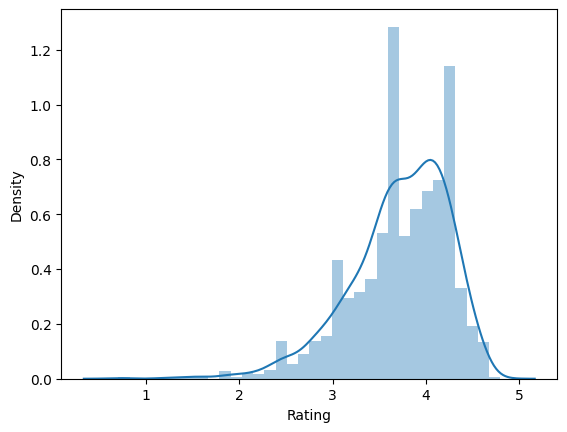

In [34]:
sns.distplot(games["Rating"])

    La cola izquierda es más larga que la derecha. Esto nos indica que hay un sesgo que